# Cyclistic study case 

## Background / Antecedentes

##### English
Cyclistic (original data from Divvy https://divvybikes.com/ ) is a bicycle time-sharing company, located in the city of Chicago (IL, USA). It has more than 600 stations and more than 5,800 bicycles (of two types: classic and electric).  

They are interested in understanding the behavior of their customers, who are classified as "members" if they have a subscription to the service, and "casuals" who correspond to people who buy a ticket for a single trip or a 1-day pass.  

They have three different plans:  
Casual: 3.3 USD per trip up to 30 minutes (additional 0.15 USD per min).  
Casual: 15 USD/day up to 180 minutes of use (additional 0.15 USD/min).  
Member: 9 USD/month up to 45 minutes per trip without travel limit (USD 108 annual plan).  
The marketing department has requested to analyze and describe the behavior of customers in the use of the service.  

##### Español
Cyclistic (datos originales de Divvy https://divvybikes.com/ ) es una empresa de tiempo compartido de bicicletas, ubicada en la ciudad de Chicago (IL, USA). Cuenta con más de 600 estaciones y más de 5,800 bicicletas (de dos tipos: clásicas y eléctricas).  

Estan interesados en entender el comportamiento de sus clientes, quienes se clasifican como "miembros" si tienen una suscripción al servicio, y en "casuales" que corresponden a personas que compran un tiquet para un único viaje  o un pase de 1 día.  

Tienen tres planes diferentes:  
Casual: 3.3 USD/trip hasta 30 minutos (adicional 0.15 USD/min).  
Casual: 15 USD/day hasta 180 minutos de uso (adicional 0.15 USD/min).  
Member: 9 USD/month hasta 45 minutos por viaje sin límite de viajes (USD 108 plan anual).   
El departamento de marketing ha solicitado analizar y describir el comportamiento de los clientes en el uso del servicio.  

In [1]:
# These are the available R packages in our Scripts environment:
# paste0(installed.packages()[,"Package"], "-", installed.packages()[,"Version"])
library(tidyverse)
library(lubridate)
library(ggplot2)
library(gridExtra)
library(dplyr)
library(utils)
library(maps)
library(sf)
library(ggrepel)
library(readr)
library(stringr)

fig <- function(width, height){
    options(repr.plot.width = width, repr.plot.height = height )
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map


Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1



In [2]:
# Data reading / Carga de datos
path <- "../input/cyclistictripdata2021/"
bike1 <- read_csv(str_c(path,"202102-divvy-tripdata.csv", sep=""))
bike2 <- read_csv(str_c(path,"202103-divvy-tripdata.csv", sep=""))
bike3 <- read_csv(str_c(path,"202104-divvy-tripdata.csv", sep=""))
bike4 <- read_csv(str_c(path,"202105-divvy-tripdata.csv", sep=""))
bike5 <- read_csv(str_c(path,"202106-divvy-tripdata.csv", sep=""))
bike6 <- read_csv(str_c(path,"202107-divvy-tripdata.csv", sep=""))
bike7 <- read_csv(str_c(path,"202108-divvy-tripdata.csv", sep=""))
bike8 <- read_csv(str_c(path,"202109-divvy-tripdata.csv", sep=""))
bike9 <- read_csv(str_c(path,"202110-divvy-tripdata.csv", sep=""))
bike10 <- read_csv(str_c(path,"202111-divvy-tripdata.csv", sep=""))
bike11 <- read_csv(str_c(path,"202112-divvy-tripdata.csv", sep=""))
bike12 <- read_csv(str_c(path,"202201-divvy-tripdata.csv", sep=""))

# Biding the files / Uniendo los archivos
bikedata <- bind_rows(bike1,bike2,bike3,bike4,bike5,bike6,bike7,bike8,bike9,bike10,bike11,bike12)

# erase original file
rm(bike1,bike2,bike3,bike4,bike5,bike6,bike7,bike8,bike9,bike10,bike11,bike12)

Rows: 49622 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 228496 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 337230 Columns: 13

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
c

In [3]:
head(bikedata)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.01270,-87.66606,42.00458,-87.66141,member
0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.01270,-87.66606,42.01954,-87.66956,casual
E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.88579,-87.63110,41.88487,-87.62750,member
B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member
83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.83473,-87.62583,41.83816,-87.64512,member
BDAA7E3494E8D545,electric_bike,2021-02-24 15:43:33,2021-02-24 15:49:05,Fairbanks St & Superior St,18003,LaSalle Dr & Huron St,KP1705001026,41.89581,-87.62025,41.89489,-87.63198,casual


## Raw data revision / Revisión de datos originales

##### English
The data comes from https://divvy-tripdata.s3.amazonaws.com/index.html which has been provided by Motivate International Inc. under this license https://ride.divvybikes.com/data-license-agreement.  
We work with the last 12 months (2021-02-01 to 2022-01-31).

##### Español
Los datos provienen de https://divvy-tripdata.s3.amazonaws.com/index.html que han sido provistos por Motivate International Inc. bajo esta licencia  https://ride.divvybikes.com/data-license-agreement.  
Se trabaja con los últimos 12 meses (2021-02-01 a 2022-01-31).

In [4]:
# summary general check
summar1 <- summary(bikedata)
summar1

   ride_id          rideable_type        started_at                 
 Length:5601999     Length:5601999     Min.   :2021-02-01 00:55:44  
 Class :character   Class :character   1st Qu.:2021-06-11 12:40:12  
 Mode  :character   Mode  :character   Median :2021-08-04 22:01:30  
                                       Mean   :2021-08-04 20:30:49  
                                       3rd Qu.:2021-09-28 16:39:49  
                                       Max.   :2022-01-31 23:58:37  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-02-01 01:22:48   Length:5601999     Length:5601999    
 1st Qu.:2021-06-11 13:03:36   Class :character   Class :character  
 Median :2021-08-04 22:23:12   Mode  :character   Mode  :character  
 Mean   :2021-08-04 20:52:45                                        
 3rd Qu.:2021-09-28 16:55:21                                        
 Max.   :2022-02-01 01:46:16      

##### English
From this first summary, we have 5,601,999 records, because it is a large number, the analysis will be fully automatic, to avoid errors.
We verify that the date ranges correspond to the period of interest, which is the last 12 months, from 2021-02-01 to 2022-01-31. We also verify that the coordinates correspond to the Chicago area, but there are some points very far away in latitude, which reaches a range of 1,040 miles, which should be reviewed later.
The other variables are within the expected ranges.

##### Español
De este primer resumen, tenemos 5,601,999 registros, por ser un gran numero, el análisis será totalmente automático, para evitar errores.  
Verificamos que los rangos de fechas correspondan al período de interés, que son los últimos 12 meses, desde 2021-02-01 al 2022-01-31. Además verificamos que las coordenadas correspondan a la zona de Chicago, pero hay algunos puntos muy alejados en latitud, que llega a un rango de 1,040 millas, lo que deberá ser revisado más adelante.  
Las demás variables están dentro de los rangos esperados. 

In [5]:
# summary of missing data
summar2 <- summary(is.na(bikedata))
summar2

  ride_id        rideable_type   started_at       ended_at      
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:5601999   FALSE:5601999   FALSE:5601999   FALSE:5601999  
                                                                
 start_station_name start_station_id end_station_name end_station_id 
 Mode :logical      Mode :logical    Mode :logical    Mode :logical  
 FALSE:4903555      FALSE:4903558    FALSE:4855179    FALSE:4855179  
 TRUE :698444       TRUE :698441     TRUE :746820     TRUE :746820   
 start_lat       start_lng        end_lat         end_lng       
 Mode :logical   Mode :logical   Mode :logical   Mode :logical  
 FALSE:5601999   FALSE:5601999   FALSE:5597245   FALSE:5597245  
                                 TRUE :4754      TRUE :4754     
 member_casual  
 Mode :logical  
 FALSE:5601999  
                

##### English
We found that the start and end times of the trip are complete, excellent news.
There is some information missing in the arrival information, 4,754 data (negligible) corresponding to arrival coordinate data were lost; furthermore, 12.5% of the starting stations and 13.3% of the finishing stations are lost.
As there are many errors in the stations, we will use the coordinates as references, and we will not use the identification data of the stations, therefore, from the initial data, we will only eliminate the 4,754 missing arrival (or end) data.
No other major errors were found.  
We identify the lost stations to eliminate them from the data to be processed.

##### Español
Encontramos que los tiempos de incios y término de viaje están completos, excelente noticia.  
Hay algo de información  perdida en la información de llegada, se perdieron 4,754 datos (despreciable) correspondientes a datos de coordenadas de llegada; además, el 12.5% de las estaciones de partida y 13.3% de las estaciones de término, están perdidos.
Como hay muchos errores en las estaciones, usaremos como referencias las coordenadas, y no usaremos los datos de identificación de las estaciones, por lo tanto, de los datos iniciales, sólo eliminaremos los 4,754 datos de llegada (o término) perdidos.
No se encontraron otros errores importantes.
Identifiamos las estaciones perdidas para eliminarlas de los datos a procesar.

In [6]:
# lost ending coordinates
lost_end <- bikedata %>%
filter(is.na(end_lat))
glimpse(lost_end)

Rows: 4,754
Columns: 13
$ ride_id            <chr> "E8AEBDA7D32FEF36", "6BC446A9919843BA", "8EA050950C…
$ rideable_type      <chr> "classic_bike", "classic_bike", "classic_bike", "cl…
$ started_at         <dttm> 2021-02-19 13:31:46, 2021-02-12 08:31:35, 2021-02-…
$ ended_at           <dttm> 2021-02-20 14:31:39, 2021-02-13 09:31:17, 2021-02-…
$ start_station_name <chr> "Lake Shore Dr & Wellington Ave", "Jeffery Blvd & 7…
$ start_station_id   <chr> "TA1307000041", "KA1503000018", "KA1503000015", "13…
$ end_station_name   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ end_station_id     <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ start_lat          <dbl> 41.93669, 41.76664, 41.87947, 41.88473, 41.94011, 4…
$ start_lng          <dbl> -87.63683, -87.57645, -87.62569, -87.61952, -87.645…
$ end_lat            <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ end_lng            <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ member_casual 

In [7]:
# lost_end removal
bikedata <- setdiff(bikedata,lost_end)

In [8]:
# Checking member_casual / Revisando miember_casual
distinct(bikedata,member_casual)

member_casual
<chr>
member
casual


In [9]:
# Checking rideable_type / Revisando rideable_type
distinct(bikedata,rideable_type)

rideable_type
<chr>
classic_bike
electric_bike
docked_bike


##### English
We found a type of bicycle that does not correspond to the classic or electric type, they are "docked_bike" type, these correspond to bicycles that were moved from their positions for service purposes and do not correspond to real customer trips, so they will be removed from the data to process.

##### Español
Encontramos una tipo de bicicleta que no corresponde a los tipo clásico o eléctrico, son tipo "docked_bike", estas corresponden a bicicletas que fueron movidas desde sus posiciones para fines del servicio y no corresponden a viajes reales de clientes, por lo que serán eliminadas de los datos a procesar.

In [10]:
# docked_bikes are elimated / se eliminan las docked_bike
bikedata <- bikedata %>%
dplyr::filter(rideable_type != "docked_bike")

In [11]:
# verifying the final data / verificando los datos finales
glimpse(bikedata)

Rows: 5,286,359
Columns: 13
$ ride_id            <chr> "89E7AA6C29227EFF", "0FEFDE2603568365", "E6159D746B…
$ rideable_type      <chr> "classic_bike", "classic_bike", "electric_bike", "c…
$ started_at         <dttm> 2021-02-12 16:14:56, 2021-02-14 17:52:38, 2021-02-…
$ ended_at           <dttm> 2021-02-12 16:21:43, 2021-02-14 18:12:09, 2021-02-…
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A…
$ start_station_id   <chr> "525", "525", "KA1503000012", "637", "13216", "1800…
$ end_station_name   <chr> "Sheridan Rd & Columbia Ave", "Bosworth Ave & Howar…
$ end_station_id     <chr> "660", "16806", "TA1305000029", "TA1305000034", "TA…
$ start_lat          <dbl> 42.01270, 42.01270, 41.88579, 41.89563, 41.83473, 4…
$ start_lng          <dbl> -87.66606, -87.66606, -87.63110, -87.67207, -87.625…
$ end_lat            <dbl> 42.00458, 42.01954, 41.88487, 41.90312, 41.83816, 4…
$ end_lng            <dbl> -87.66141, -87.66956, -87.62750, -87.67394, -87.645…
$ member_cas

## Processing / Procesamiento

##### English
To the initial data we add the trip duration (in seconds), the start date of the trip, with format yyyy-mm-dd, month of start of the trip as an integer, day of the week as an integer, and geographical start point and end of the trip.

##### Español
A los datos iniciales les agregamos la duración del viajes (en segundos), la fecha de inicio del viaje, con formato yyyy-mm-dd, mes de inicio del viaje como entero, día de la semana como entero, y punto geográfico de inicio y término del viaje.


In [12]:
# var added duration_seg, start_day, start_point, end_point, month, week_day 
bikedata <- bikedata %>%
mutate(
duration_seg= as.integer(seconds(ended_at) - seconds(started_at)),
start_day = as_date(started_at),
start_point = str_c(round(start_lng,2),round(start_lat,2),sep= "-"),
end_point = str_c(round(end_lng,2),round(end_lat,2), sep= "-"),
month = month(start_day, label= TRUE, abbr= TRUE),
week_day = wday(started_at), 
)

Note: method with signature ‘Period#ANY’ chosen for function ‘-’,
 target signature ‘Period#Period’.
 "ANY#Period" would also be valid



In [13]:
head(bikedata)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_seg,start_day,start_point,end_point,month,week_day
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<date>,<chr>,<chr>,<ord>,<dbl>
89E7AA6C29227EFF,classic_bike,2021-02-12 16:14:56,2021-02-12 16:21:43,Glenwood Ave & Touhy Ave,525,Sheridan Rd & Columbia Ave,660,42.01270,-87.66606,42.00458,-87.66141,member,407,2021-02-12,-87.67-42.01,-87.66-42,Feb,6
0FEFDE2603568365,classic_bike,2021-02-14 17:52:38,2021-02-14 18:12:09,Glenwood Ave & Touhy Ave,525,Bosworth Ave & Howard St,16806,42.01270,-87.66606,42.01954,-87.66956,casual,1171,2021-02-14,-87.67-42.01,-87.67-42.02,Feb,1
E6159D746B2DBB91,electric_bike,2021-02-09 19:10:18,2021-02-09 19:19:10,Clark St & Lake St,KA1503000012,State St & Randolph St,TA1305000029,41.88579,-87.63110,41.88487,-87.62750,member,532,2021-02-09,-87.63-41.89,-87.63-41.88,Feb,3
B32D3199F1C2E75B,classic_bike,2021-02-02 17:49:41,2021-02-02 17:54:06,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,265,2021-02-02,-87.67-41.9,-87.67-41.9,Feb,3
83E463F23575F4BF,electric_bike,2021-02-23 15:07:23,2021-02-23 15:22:37,State St & 33rd St,13216,Emerald Ave & 31st St,TA1309000055,41.83473,-87.62583,41.83816,-87.64512,member,914,2021-02-23,-87.63-41.83,-87.65-41.84,Feb,3
BDAA7E3494E8D545,electric_bike,2021-02-24 15:43:33,2021-02-24 15:49:05,Fairbanks St & Superior St,18003,LaSalle Dr & Huron St,KP1705001026,41.89581,-87.62025,41.89489,-87.63198,casual,332,2021-02-24,-87.62-41.9,-87.63-41.89,Feb,4


##### English
Now we check the duration of the trips looking for non-useful data.

##### Español
Ahora revisamos la duración de los viajes en busca de datos no útiles.

In [14]:
# duration < 1 second
summary(bikedata$duration_seg < 1)

   Mode   FALSE    TRUE 
logical 5285715     644 

In [15]:
# duration > 1 day
summary(bikedata$duration_seg>24*3600)

   Mode   FALSE    TRUE 
logical 5286240     119 

##### English
In the  trips duration analysis, we find 644 that last less than 1 second or negative (negligible), which we will discard from the analysis.
Regarding those of more than 1 day, there are 119 but we will not do an analysis of these due to their reduced number and they will also not be included in the study.
Therefore, for the processing we only use the data of trips that had a duration between 1 sec and 86,400 sec.

##### Español
En el análisis de las duración de los viajes, encontramos 644 que duran menos de 1 segundo o negativos (despreciable), los que descartaremos del análisis.  
Respecto a los de más de 1 día, hay 119  pero no haremos un análisis de estos porlo reducido de su número y también no entrarán en el estudio.  
Por lo que para el procesamiento sólo usamos los datos de viajes que tuvieron una duración entre 1 seg y 86,400 seg.

In [16]:
# agrupa duracion entre 1seg y 1dia
de24hrs <- bikedata %>%       
filter(duration_seg > 0 & duration_seg <= 24*3600)
glimpse(de24hrs)

Rows: 5,285,596
Columns: 19
$ ride_id            <chr> "89E7AA6C29227EFF", "0FEFDE2603568365", "E6159D746B…
$ rideable_type      <chr> "classic_bike", "classic_bike", "electric_bike", "c…
$ started_at         <dttm> 2021-02-12 16:14:56, 2021-02-14 17:52:38, 2021-02-…
$ ended_at           <dttm> 2021-02-12 16:21:43, 2021-02-14 18:12:09, 2021-02-…
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A…
$ start_station_id   <chr> "525", "525", "KA1503000012", "637", "13216", "1800…
$ end_station_name   <chr> "Sheridan Rd & Columbia Ave", "Bosworth Ave & Howar…
$ end_station_id     <chr> "660", "16806", "TA1305000029", "TA1305000034", "TA…
$ start_lat          <dbl> 42.01270, 42.01270, 41.88579, 41.89563, 41.83473, 4…
$ start_lng          <dbl> -87.66606, -87.66606, -87.63110, -87.67207, -87.625…
$ end_lat            <dbl> 42.00458, 42.01954, 41.88487, 41.90312, 41.83816, 4…
$ end_lng            <dbl> -87.66141, -87.66956, -87.62750, -87.67394, -87.645…
$ member_cas

## Anslysis / Análisis

### Overview / Vista general

In [17]:
# resumen de member/casual
resum0 <- de24hrs %>%
group_by(member_casual) %>%
summarize(
n = n(),
avg_duration_min = as.double(mean(duration_seg)/60),
total_time_days= as.integer(sum(duration_seg)/86400)
)
resum0

member_casual,n,avg_duration_min,total_time_days
<chr>,<int>,<dbl>,<int>
casual,2214582,23.42245,36021
member,3071014,13.31035,28386


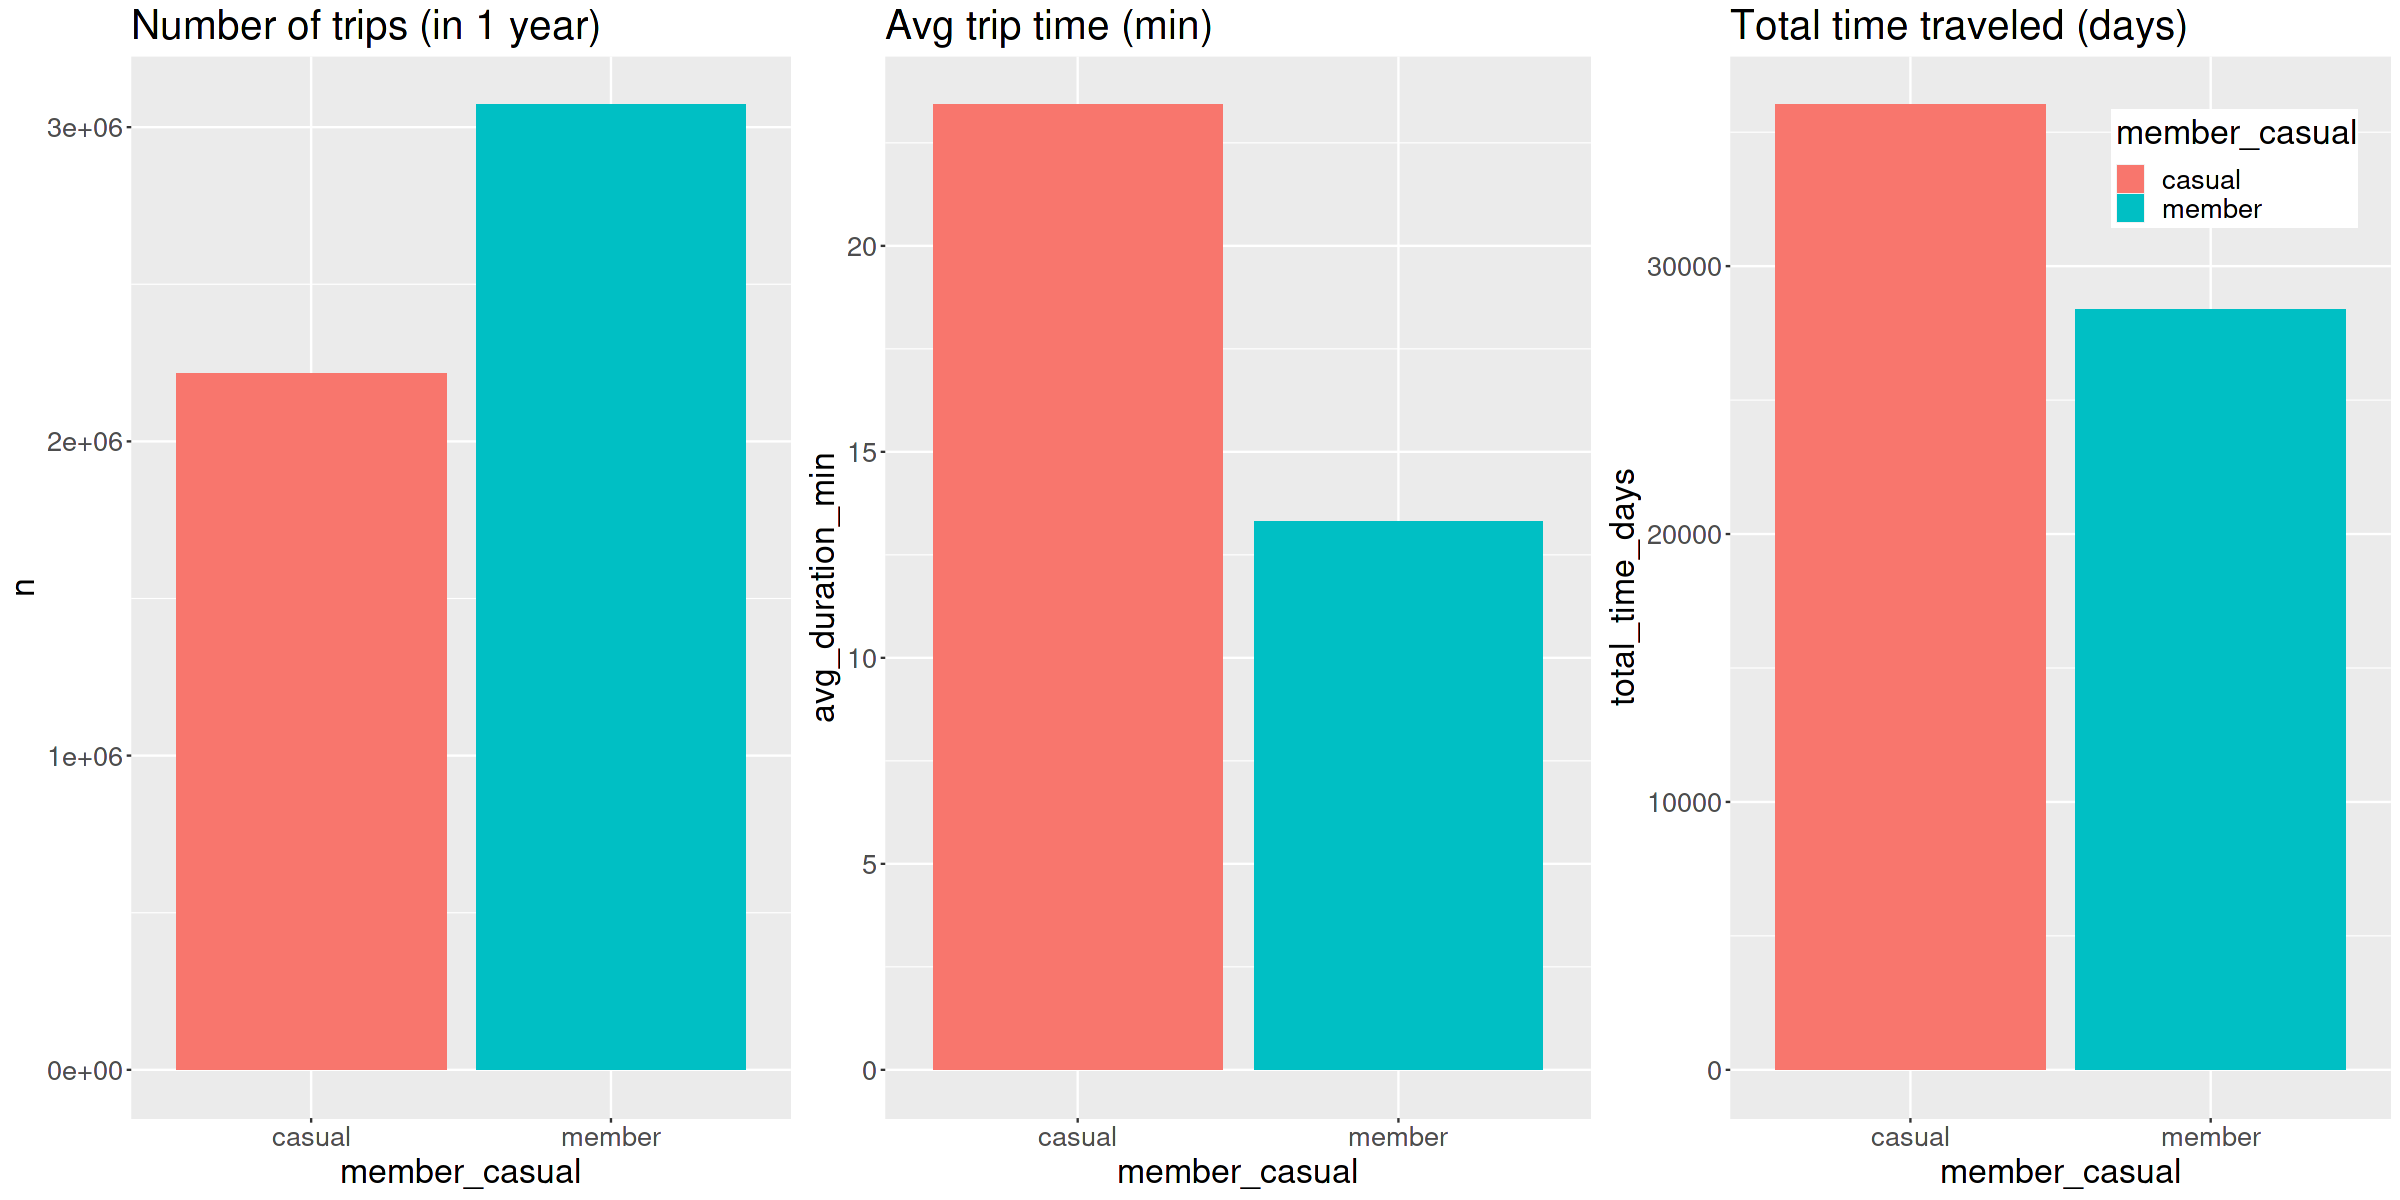

In [18]:
# resum0 graphics
fig(20,10)
p01 <- ggplot2::ggplot(data=resum0)+
geom_col(aes(x= member_casual, y= n, fill=member_casual))+
labs(title= "Number of trips (in 1 year)")+
theme(legend.position="none",text = element_text(size=20))
p02 <- ggplot2::ggplot(data=resum0)+
geom_col(aes(x= member_casual, y= avg_duration_min, fill=member_casual))+
labs(title= "Avg trip time (min)")+
theme(legend.position="none",text = element_text(size=20))
p03 <- ggplot2::ggplot(data=resum0)+
geom_col(aes(x= member_casual, y= total_time_days, fill=member_casual))+
labs(title="Total time traveled (days)")+
theme(
legend.position= c(.95,.95),
legend.justification= c("right","top"),
legend.box.jus= "right",
legend.margin= margin(3,3,3,3),
text = element_text(size=20))
gridExtra::grid.arrange(p01,p02,p03, nrow= 1)


##### English
From this first view, we can see that members take 39% more trips than casuals, but casual customers' trips last 76% longer than members.
If we consider the total time of use of the service (which we will measure in days), casual customers use the service 27% more than members. The difference in use would indicate that casual customers are mostly people who use the system for recreation.  

A customer who uses the system 3 times a month on 30-minute trips would pay the same as a member, which makes us think that casual customers should not repeat the use of the service very often and should be more associated with tourism.  
> **Question 1: What is the profile of casual users, are they mainly tourists?**

On the other hand, the income from casual customers is estimated at USD 7,300,000, which to be matched by members, would be equivalent to having more than 67,000 new members.

We can make an estimate of the income per member, as the average trips within the week, assuming that they make 2 trips a day (home-work-home) and that they make one trip a week for entertainment (home-friends-home) which would mean that each client would make 2.2 daily trips, so there would be approximately 13,200 members (see detailed calculation in analysis by day of the week) that would generate annual income of approximately USD 1,425,000.

##### Español
De esta primera vista, podemos ver que los miembros realizan un 39% más viajes que los casuales, pero los viajes de los clientes casuales duran un 76% más que los miembros.  
Si consideramos el tiempo total de uso del servicio (que mediremos en días), los clientes casuales usan el servicio un 27% más que los miembros. La diferencia de uso indicaría que los clientes casuales son mayoritariamente personas que usan el sistema para recreo.  

Un cliente que use el sistema 3 veces al mes en viajes de 30 minutos pagaría lo mismo que un miembro, lo que nos hace pensar, que los clientes casuales no deben repetir el uso servicio con mucha frecuencia y deben estar más asociados al turismo.  
> **Pregunta1: Cuál es el perfil de los usuarios casuales, son principalmente turistas?**  

Por otro lado, los ingresos provenientes de los clientes casuales los estimo en USD 7,300,000 que para ser igualados por miembros, equivaldría a tener más de 67,000 nuevos miembros.

Podemos hacer una estimación de los ingresos por miembros, como los viajes promedio dentro de la semana, suponiendo que realizan 2 viajes al dia (casa-trabajo-casa) y que hacen una salida a la semana para entretención (casa-amigos-casa) lo que significaría que cada cliente haría 2,2 viajes diaros, por lo que existirían, aproximadamente 13,200 miembros (ver cálculo detallado en análisis por día de la semana) que generarían unos ingresos anuales de aproximadamente USD 1,425,000.


### Different bikes / Bicicletas diferentes

In [19]:
# Bike type
resum1 <- de24hrs %>%
group_by(member_casual,rideable_type) %>%
summarise(
n = n(),
avg_duration_min = as.double(mean(duration_seg)/60),
total_time_days = as.integer(sum(duration_seg)/86400),
dispersion= var(duration_seg)/mean(duration_seg)
)
resum1 

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,rideable_type,n,avg_duration_min,total_time_days,dispersion
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
casual,classic_bike,1261950,26.16231,22927,4479.276
casual,electric_bike,952632,19.79297,13094,1722.495
member,classic_bike,1977605,13.68329,18791,2015.922
member,electric_bike,1093409,12.63582,9594,1223.196


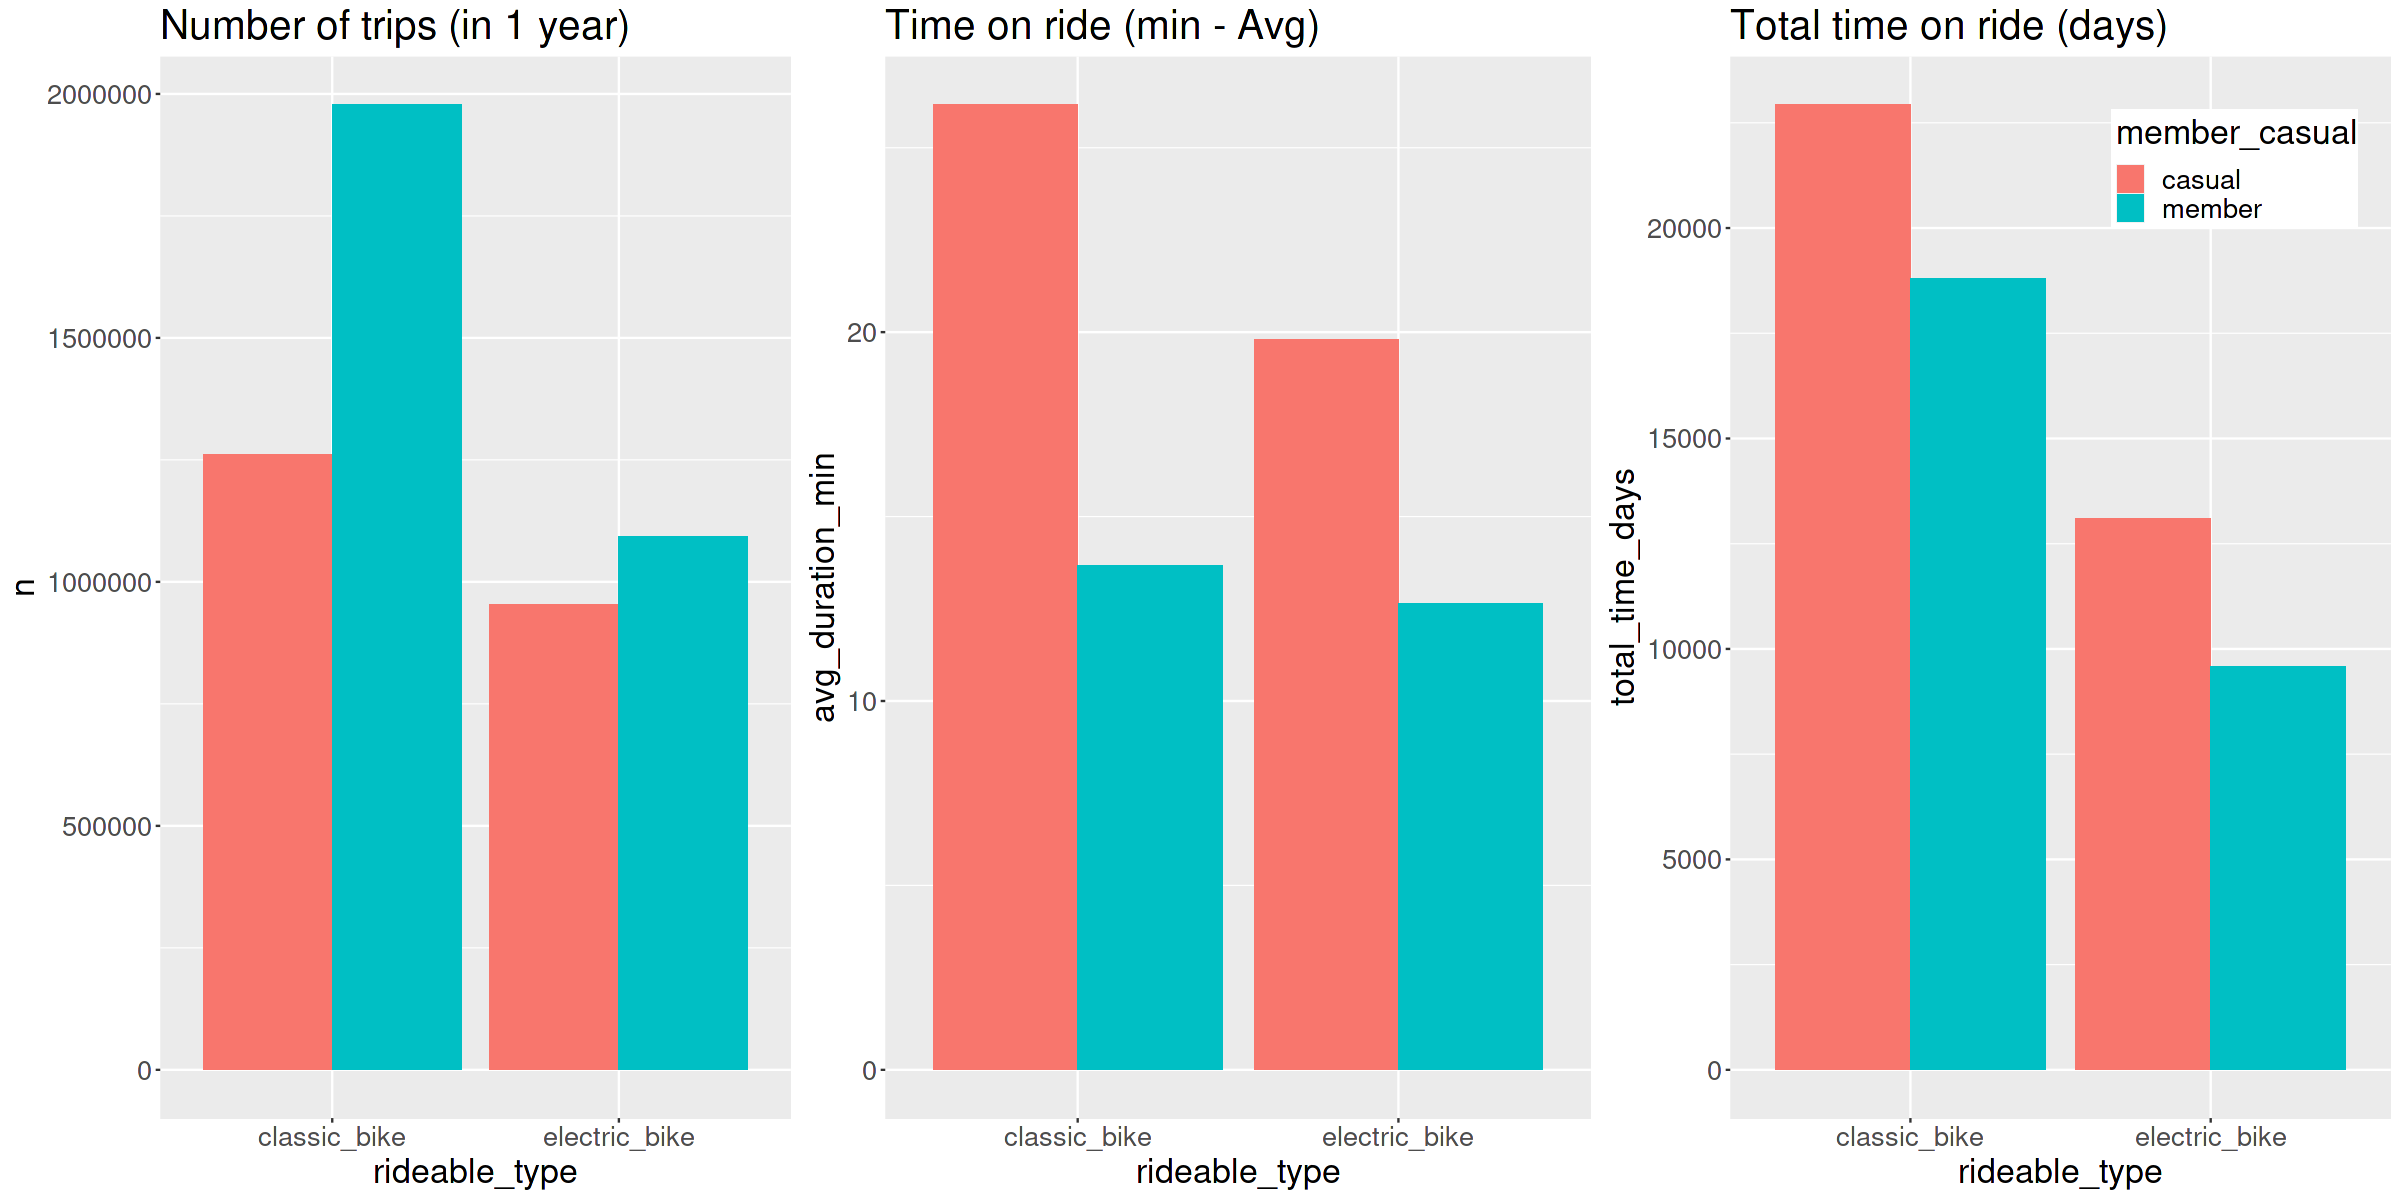

In [20]:
# resum1 graphics
fig(20,10)
p11 <- ggplot(data= resum1)+
geom_col(aes(x= rideable_type,y= n, fill= member_casual), position= "dodge")+
labs(title= "Number of trips (in 1 year)")+
theme(legend.position= "none",text = element_text(size=20))
p12 <- ggplot(data= resum1)+
geom_col(aes(x= rideable_type,y= avg_duration_min, fill= member_casual), position= "dodge")+
labs(title= "Time on ride (min - Avg)")+
theme(legend.position= "none",text = element_text(size=20))
p13 <- ggplot(data= resum1)+
geom_col(aes(x= rideable_type, y= total_time_days, fill= member_casual), position= "dodge")+
labs(title= "Total time on ride (days)")+
theme (
legend.position= c(.95,.95),
legend.justification= c("right","top"),
legend.box.jus= "right",
legend.margin= margin(3,3,3,3),
text = element_text(size=20))
grid.arrange(p11,p12, p13, nrow= 1)

##### English
Regarding the use of the different types of bicycles, due to the number of trips, the members prefer the classic bicycles to the electric ones (1.81 times more), while the casual ones show a less marked preference (1.32 times).  

Regarding the duration of the trips, the members show a very even behavior, with a variation of 13.7 and 12.6 min, this regularity of the member clients would indicate that they are using the bicycles for the same purpose of transport regardless of the type of bicycle.

On the other hand, casual customers have a particular behavior, since electric bicycle trips last 10 minutes less than the time allowed for a ride ticket, which makes us wonder:  
> **Question 2: Why are electric bike trips 30% shorter than the classic ones for casual customers? Can they make the trip faster, thanks to the help of the electric system?**

##### Español
Respecto al uso de los diferentes tipos de bicicletas, por la cantidad de viajes, los miembros prefieren las bicicletas clásicas a las eléctricas (1,81 veces más), mientras que los casuales muestran una preferencia menos marcada (1,32 veces).  

Respecto a la duración de los viajes, los miembros muestra un comportamiento muy parejo, con una variacióon de 13.7 y 12.6 min, esta regularidad de los clientes miembros indicaría que están usando las bicicletas para el mismo fin de transporte independientemente del tipo de bicicleta.   

Por otro lado los clientes casuales tienen un comportamiento particular, ya que los viajes en bicicleta eléctrica duran 10 minutos menos que el tiempo permitido para un ticket por paseo, lo que nos hace preguntarnos:  
> **Pregunta2: Por qué son los viajes en bicicleta eléctricas son un 30% más cortos que las clásicas para los clientes casuales?, Pueden hacer el recorrido más rápido, por la ayuda del sistema eléctrico?**


### Week day / Día de la semana

In [21]:
# week day analysis
resum2 <- de24hrs %>%
group_by(week_day, member_casual) %>%
summarise(
n=n(),
avg_duration_min= mean(duration_seg)/60,
total_time_days= sum(duration_seg)/86400
)
resum2

`summarise()` has grouped output by 'week_day'. You can override using the `.groups` argument.



week_day,member_casual,n,avg_duration_min,total_time_days
<dbl>,<chr>,<int>,<dbl>,<dbl>
1,casual,409772,27.05849,7699.870
1,member,376016,15.21753,3973.635
2,casual,249973,23.61848,4099.988
2,member,418248,12.88601,3742.740
3,casual,245022,21.15859,3600.222
3,member,468499,12.55640,4085.182
4,casual,251364,20.52988,3583.661
4,member,478544,12.57420,4178.686
5,casual,258306,20.40580,3660.376


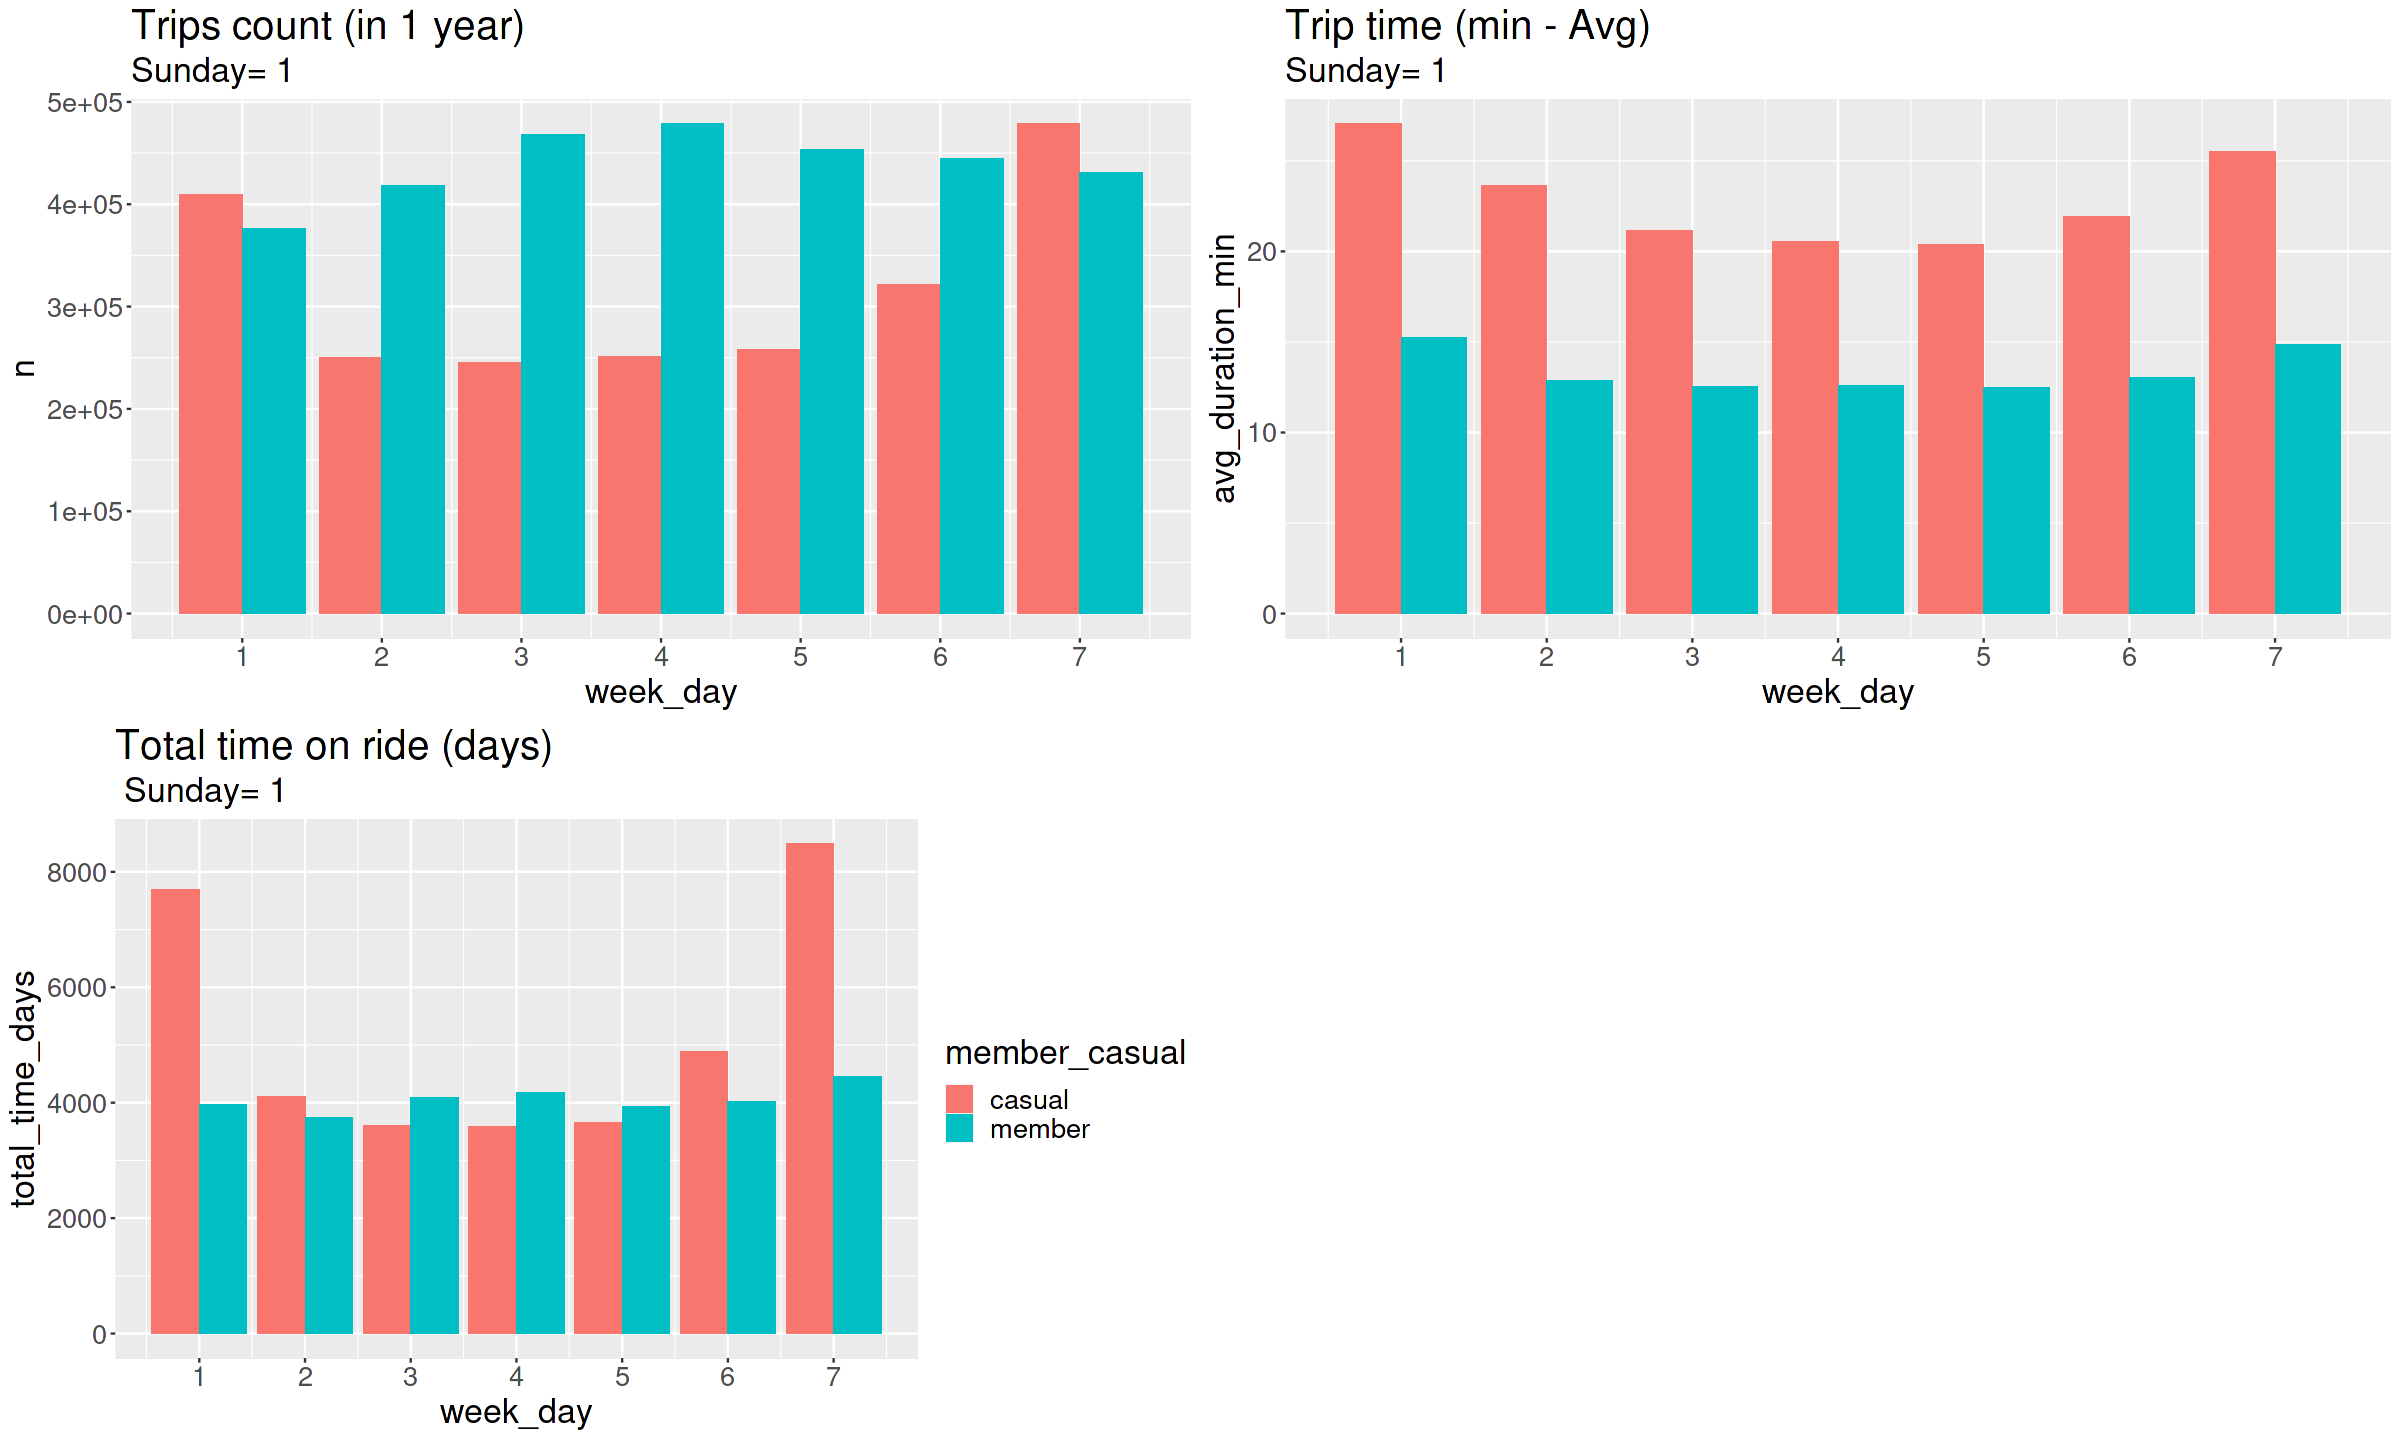

In [22]:
# resum2 graphics
fig(20,12)
p21 <- ggplot(data= resum2)+
geom_col(aes(x= week_day, y= n, fill= member_casual), position= "dodge")+
scale_x_continuous(breaks= c(1:7))+
labs(title= "Trips count (in 1 year)", subtitle= "Sunday= 1")+
theme(legend.position= "none",text = element_text(size=20)) 
p22 <- ggplot(data= resum2)+
geom_col(aes(x= week_day, y= avg_duration_min, fill= member_casual), position= "dodge")+
scale_x_continuous(breaks= c(1:7))+
labs(title= "Trip time (min - Avg)", subtitle= "Sunday= 1")+
theme(legend.position= "none",text = element_text(size=20))
p23 <- ggplot(data= resum2)+
geom_col(aes(x= week_day, y= total_time_days, fill= member_casual), position= "dodge")+
scale_x_continuous(breaks= c(1:7))+
labs(title= "Total time on ride (days)", subtitle= " Sunday= 1")+
theme(text = element_text(size=20))
grid.arrange(p21,p22, p23, nrow= 2)

##### English
When it comes to the number of trips, casual customers take a few more trips than members on weekends, but during the week, members vastly outnumber casual travelers. But there is something particular, and that is why members have travel peak on Wednesday, if we thought that members use it mainly for trips to work or meetings with friends, what happens on Wednesday?  
>**Question 3: Why do members have peak usage on Wednesday?**  

Due to the duration of the trips, within the week, the members are very regular, which would indicate a weekly routine, home-work-after office-home, and on the weekends a slight increase, with a different routine, home-no work-home.

For casual customers, a highly expected behavior is distinguished, with weekends higher than the week, but we could also assume that there must be an influx of tourists who come to Chicago for the weekend, and that is why trips go up on Fridays, Saturdays and Sundays, with a peak on Saturdays, since some will have to return to their cities on Sunday, lowering the demand on Sunday. In the same way, it could be assumed that the base of tourists on weekdays are travelers from further afield and therefore only once.

Estimate number of subscribers, we have already estimated 2.2 trips per day for each member, to estimate the number of members, we will add the trips in the week, divide them by the 5 days of the week, the 52 weeks of the year and the 2.2 trips per member; but since the data belongs to the pandemic period, we will only say that they used the system 30% of the time compared to a normal period:

##### Español
Respecto a la cantidad de viajes, los fines de semana los clientes casuales realizan uno pocos viajes más que los miembros, pero durante la semana, los miembros superan ampliamente a los viajeros casuales. Pero hay algo particular, y es por qué los miembros tienen peak de viajes el día miércoles, si pensabamos que los miembros lo usan principalmente para viajes al trabajo o reuniones con amigos, qué ocurre el miércoles?.  
> **Pregunta3: Por qué los miembros tienen peak de uso el día miércoles?.** 

Por la duración de los viajes, dentro de la semana, los miembros son muy regulares, que indicaría una rutina semanal, casa-trabajo-after office-casa, y el fin de semana un alza leve, con una rutina diferente, casa-no trabajo-casa.

Para los clientes casuales, se distingue un comportamiento muy esperado, con los fines de semana más altos que la semana, pero además podríamos suponer que debe haber una afluencia de turistas que vienen a Chicago por el fin de semana, y por eso suben los viajes los viernes, sábado y domingos, con peak en los sábados, ya que algunos deberán volver a sus ciudades el día domingo, bajando la demanda sobre el domingo. De la misma forma se podría suponer, que la base de turistan en dia de semana son viajeros de más lejos y por lo tanto de una única vez.

Estimación número de abonados, ya hemos estimado 2.2 viajes por día para cada miembro, para estimar el número de miembros, sumaremos los viajes en la semana, los dividimos por los 5 días de la semana, las 52 semanas del año y los 2.2 viajes por miembro; pero como los datos pertenecen al período de pandemia, sólo diremos que usaron el sistema un 30% del tiempo respecto a un período normal:

In [23]:
# memebers estimate
members <- sum(resum2[4, 3], resum2[6, 3], resum2[8, 3],
  resum2[10, 3],resum2[12, 3]) / ( 5 * 52 * 2.2 * 0.3)
members

[1] 13190.78

### During the year / Durante el año

In [24]:
# Month analysis / Análisis por mes
resum3 <- de24hrs %>%
group_by(month,member_casual) %>%
summarise(
n = n(),
avg_duration_min = mean(duration_seg)/60,
total_time_days = sum(duration_seg)/86400
)
resum3

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.



month,member_casual,n,avg_duration_min,total_time_days
<ord>,<chr>,<int>,<dbl>,<dbl>
Jan,casual,17513,16.20680,197.1039
Jan,member,85217,11.57847,685.1959
Feb,casual,8795,26.42080,161.3687
Feb,member,39322,15.10972,412.6002
Mar,casual,68259,26.57289,1259.6105
Mar,member,144398,13.78395,1382.2047
Apr,casual,111683,26.13379,2026.8753
Apr,member,200520,14.44201,2011.0492
May,casual,213190,26.81354,3969.7070


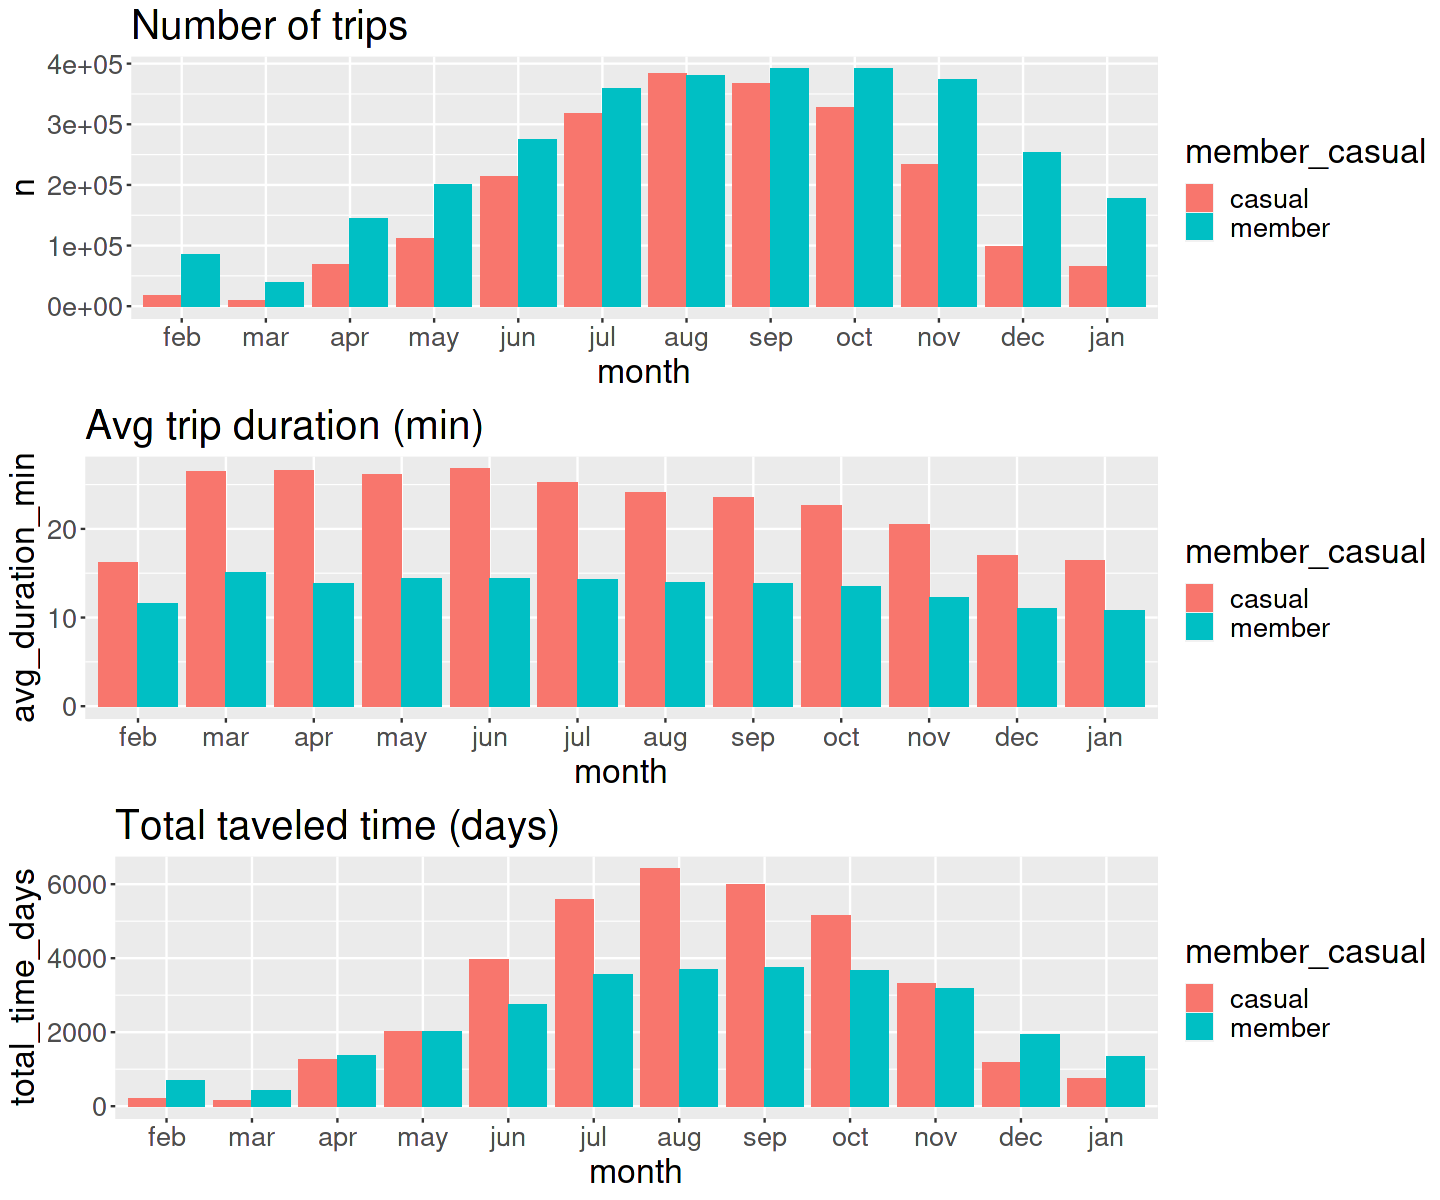

In [25]:
# resum3 graphics
fig(12,10)
p31 <- ggplot(data= resum3)+
geom_col(aes(x= month, y=n, fill= member_casual), position= "dodge")+
scale_x_discrete(labels= c("feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec","jan"))+
labs(title= "Number of trips")+
theme(text = element_text(size=20))
p32 <- ggplot(data= resum3)+
geom_col(aes(x= month, y= avg_duration_min, fill= member_casual), position= "dodge")+
scale_x_discrete(labels= c("feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec","jan"))+
labs(title= "Avg trip duration (min)")+
theme(text = element_text(size=20))
p33 <- ggplot(data= resum3)+
geom_col(aes(x= month, y= total_time_days, fill= member_casual), position= "dodge")+
scale_x_discrete(labels= c("feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec","jan"))+
labs(title= "Total taveled time (days)")+
theme(text = element_text(size=20))
grid.arrange(p31, p32, p33, nrow= 3)


##### English
The distribution of the number of trips for both types of clients is highly expected, because it is affected by the weather and during the winter, both reach their minimum demand (February), and their maximum demand during the summers (July and August).

The duration of the trips, for the members, is quite uniform throughout the year, reinforcing the assumption that its use is to transmute home-work. But it is very rare for casual customers, because strangely the highest months are recorded between February and April, the coldest months.  
> **Question 4: Why do the travel times of casual customers peak in the colder months?**

##### Español
La distribución del número de viajes para ambos tipos de clientes es muy esperado, porque se ve afectado por el clima y durante el invierno, ambos llegan a su mínima demanda (febrero), y a su máxima demanda durante el veranos (julio y agosto).

La duración de los viajes, para los miembros es bastante uniforme durante todo el año, reforzando la suposición de que su uso es para transmutar casa-trabajo. Pero es muy raro para los clientes casuales, porque extrañamente los meses más altos se registran entre febrero y abril, los meses más fríos.  
> **Pregunta4: Por qué los tiempos viaje de los clientes casuales tienen su peak los meses más frios?**


## Conclusions / Conclusiones

##### English
There are interesting things from the Cyclistic data analysis, and also strange things that require further investigation, which were raised as questions.

Regarding the discoveries:
* Member clients use the system for regular trips, while casual ones use it for recreation.
* Casual customers would be mainly tourists, with a relevant part of weekend tourists.
* Regarding revenue, casual customers generate 5 times more revenue than members.
* The general behavior of customers is very seasonal and mainly affected by temperatures.
* Regarding the use of bicycles, there is a preference for classic bicycles by both groups of clients.

##### Español
Hay cosas interesantes del análisis de los datos de Cyclistic, y también cosas extrañas que requieren más investigación, lo que quedó planteado como preguntas.

Respecto a los hallazgos:
* Los clientes miembros usan el sistema para viajes regulares, mientras los casuales para recreo.
* Los clientes casuales serían principalmente turistas, con una parte relevante de turistas de fin de semana.
* Respecto a los ingresos, los clientes casuales generan 5 veces más ingresos que los miembros.
* El comportamiento en general de los clientes es muy estacional y afectado principalmente por las temperaturas.
* Respecto al uso de las bicicletas, hay una preferencia por las bicicletas clásicas por ambos grupos de clientes.



## Suggestions / Sugerencias

##### English
* Both groups of customers have very different behaviors, so the campaigns must be adapted for each profile.
    + Members use the system mainly to commute
    + Casuals are mainly tourists and will use the system without repetition
* We believe that since they are casual customers, mainly tourists, it is very difficult to create members from that group. We suggest that in order to grow the membership base, direct the strategy to attract customers from competing transport systems (public transport, car, uber).
* Another alternative to attract member clients is a plan with companies. For example, create monthly packages that are interchangeable between people, so that the company can have a prefixed number of monthly member-type users.
* Winter is a big barrier to growth, so that spare capacity could be moved to warmer locations during winter.

##### Español
* Ambos grupos de clientes tienen comportamientos muy diferentes por lo que las campañas deben ser adaptadas para cada perfil.
    + Los miembros usan el sistema principalmente para viajes regulares
    + Los casuales son principalmente turistas y usarán el sistema sin repetición
* Creemos que por ser los clientes casuales, principalmente turistas, es muy difícil crear miembros desde ese grupo. Sugerimos que para crecer la base de miembros dirigir la estrategia a atraer clientes desde sistemas de transportes que son competencia (transporte público, auto, uber).  
* Otra alternativa para atraer clientes miembros, es un plan con empresas. Por ejemplo crear paquetes por meses, que sean intercambiables entre personas, de tal forma que la empresa pueda contar con un número prefijo de usuarios mensuales tipo miembros.
* El invierno es una gran barrera de crecimiento, por lo que esa capacidad disponible podría ser movida a lugares más cálidos durante el invierno.
